### AND 연산
- 문제정의  
    훈련 데이터와 테스트 데이터 이해하기  
    AND 연산의 결과를 도출하는 머신러닝 모델 학습하고 이해하기

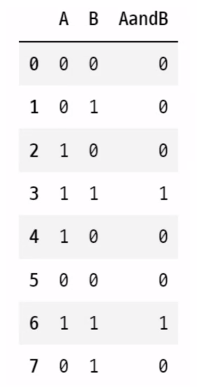

### 데이터 만들기

In [1]:
# 필요한 도구 불러오기
import pandas as pd

In [2]:
# 데이터 프레임 형태로 만들기
# 행 : 8, 열(컬럼) : 3

# 딕셔너리 {} 안으로
# 리스트 []

df = pd.DataFrame({'A' : [0,0,1,1,1,0,1,0],
                   'B' : [0,1,0,1,0,0,1,1],
                   'AandB' : [0,0,0,1,0,0,1,0]})
df

,A,B,AandB
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1
4,1,0,0
5,0,0,0
6,1,1,1
7,0,1,0


- 'A'와 'B' : 문제데이터, 특성, feature, 독립변수, X, 속성
- 'AandB' : 정답데이터, target, label, 클래스, 종속변수,  y

### 데이터 전처리
- 컬럼인덱싱을 통해서 문제데이터(X)와 정답데이터(y)로 분리하기

In [3]:
# '문제 데이터' 가져오기 A,B 
X = df[['A','B']]

# 문자인덱싱! df.loc[행,열] 
# => df.loc[:,'A':'B']  문자로 슬라이싱은 끝값을 포함
# df.loc[:, ['A','B']]
# 숫자 인덱싱 df.iloc[행, 열] 
# => df.iloc[:,:2] *2로 적어준다. , df.iloc[:, 0,1]

# X = DataFrame 형태

# '정답 데이터'
y = df['AandB']
# y 는 numpy의 array 형태

display(X)
display(y)

,A,B
0,0,0
1,0,1
2,1,0
3,1,1
4,1,0
5,0,0
6,1,1
7,0,1


0    0
1    0
2    0
3    1
4    0
5    0
6    1
7    0
Name: AandB, dtype: int64

#### 학습을 위해 '훈련용 데이터'와 '테스트용 데이터'로 분할
- 학습(훈련), 검증(테스트)

In [17]:
# 훈련용 데이터 : X, y ==> 0-5 까지 포함해서 행 슬라이싱
# 테스트용 데이터 : X, y ==> 6-7 까지 행 슬라이싱

X_train = X.iloc[:6]
X_test = X.iloc[6:]
y_train = y.iloc[:6]
y_test =y.iloc[6:]
X_train

,A,B
0,0,0
1,0,1
2,1,0
3,1,1
4,1,0
5,0,0


In [5]:
# 데이터 크기 확인 -> shape
print('훈련용 문제 : ',X_train.shape)
print('훈련용 답 : ',y_train.shape)
print('테스트용 문제 : ',X_test.shape)
print('테스트용 답 : ',y_test.shape)

훈련용 문제 :  (6, 2)
훈련용 답 :  (6,)
테스트용 문제 :  (2, 2)
테스트용 답 :  (2,)


### 머신러닝 모델 학습하기

#### 학습하기 위한 머신러닝 모델 불러오기

In [6]:
# scikit-learn : 머신러닝용 패키지 라이브러리 불러오기
from sklearn.neighbors import KNeighborsClassifier # KNN 분류 모델

#### 모델 생성 및 하이퍼 파라미터 정의(튜닝)

In [7]:
knn_model = KNeighborsClassifier(n_neighbors=1)

# n_neighbors : 하이퍼 파라미터 - 사용자가 입력하는 매개변수
# 하이퍼 파라미터에 따라서 모델 학습이 달라진다.

# n_neighbors 가 5 이면 예를 들어 0이 3개 1이 두개 
# 내 이웃의 갯수로 나를 판단하는 것. 

# 내 이웃이 1이많다- 나는 1 & 0이 많다- 나는 0.
# 가장 가까운 이웃들의 실제 답을 확인하고 그 답이 내것인것 처럼 사용
# n_neighbors = 1 : 가장 가까운 이웃 1개의 실제 답을 확인하겠다.

#### 모델 학습

In [8]:
# fit() 사용
# fit(훈련용 문제, 훈련용 답)
knn_model.fit(X_train, y_train) # 훈련용 데이터에 맞춰서 학습 - 지도학습(문제,답)

KNeighborsClassifier(n_neighbors=1)

#### AND 연산 예측 - 지도 학습

In [9]:
X_test

,A,B
6,1,1
7,0,1


In [15]:
# and 연산 예측
# 0과 1 두 수가 데이터로 주어짐 = 회귀

# 0,0 ->0
# 0,1 ->0
# 1,0 ->0
# 1,1 ->1

# predict(테스트용 문제)
pre = knn_model.predict(X_test)  
pre # 결과를 활용하기 위해 변수에 담기 (예측치임, 정확한 정답은 아님)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0], dtype=int64)

In [11]:
X_test

,A,B
6,1,1
7,0,1


In [12]:
# test 용 정답
y_test

6    1
7    0
Name: AandB, dtype: int64

### 평가 

#### 모델 평가하는 모듈 불러오기

In [13]:
from sklearn.metrics import accuracy_score # 정확도 점수 (모델 성능 평가 지표)

In [16]:
# 정확도? 
# 정답 -> 예측
# 0-> 0 (정답)
# 1-> 1 (정답)
# 1-> 0 (오류)
# accuracy_score : 모델이 가지고 있는 함수가 아니고 그냥 함수 자체적으로 역할

# accuracy_score(실제답, 예측값)

accuracy_score(y_test, pre) # 확률 정보로 값을 표시 
# 1.0 -> 100%맞췄다는 의미 (모델의 성능이 괜찮다)
# 0.0 에 가까울수록 모델의 성능이 좋지 못하다고 판단



1.0